# *Research Question:* What other aspects of wellness predict whether one uses physical activity as a coping mechanism?

- ## A survey was given to first-year incoming freshmen at Truman State University over the past five consecutive years. 
- ### In this research, I attempt to answer the above question. 

# Loading the appropriate libraries

In [127]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score)

# Load the data file `PreTest_ReadyForRStudio.csv`

In [129]:
data = pd.read_csv("PreTest_ReadyForRStudio.csv")

# Basic data observations honed in on the `Physical_Activity_Scress` variable. This is an essential variable for this research.
- ## Note: The `Physical_Activity_Stress` variable was an answer to the following question on a Likert scale from 1-4: _I use physical activity as a coping mechanism to help deal with stress_

In [131]:
data["Physical_Activity_Stress"].describe()

count    1074.000000
mean        2.675047
std         1.010472
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: Physical_Activity_Stress, dtype: float64

# Basic histogram of the `Physical_Activity_Stress` variable

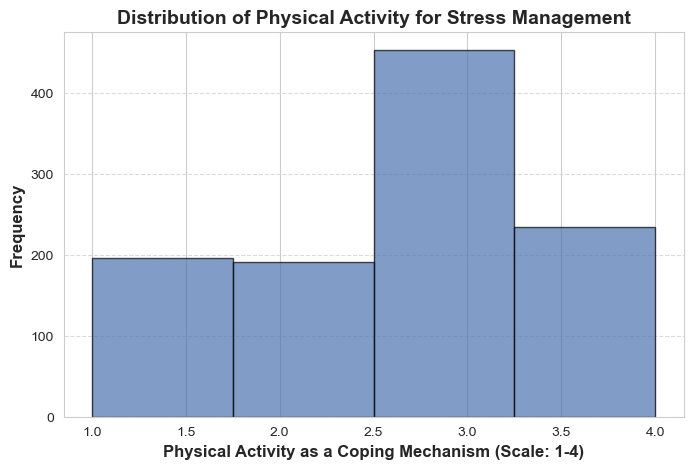

In [133]:
sns.set_style("whitegrid")

plt.figure(figsize=(8, 5))
plt.hist(data["Physical_Activity_Stress"], bins=4, color="#4C72B0", edgecolor="black", alpha=0.7)
plt.xlabel('Physical Activity as a Coping Mechanism (Scale: 1-4)', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Distribution of Physical Activity for Stress Management', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Correlation heatmap of physical-related variables and `Stress_Coping`
- ## `Physical_Activity_Stress`, `Exercise_150_Min`, and `Strength_Training` are positively correlated (0.64), which is expected since these variables all relate to physical activity.
- ## `Stress_Coping` has a slightly positive correlation (~0.27-0.29) with physical activity variables, indicating that students who engage in more physical activity tend to feel more confident in coping with stress.

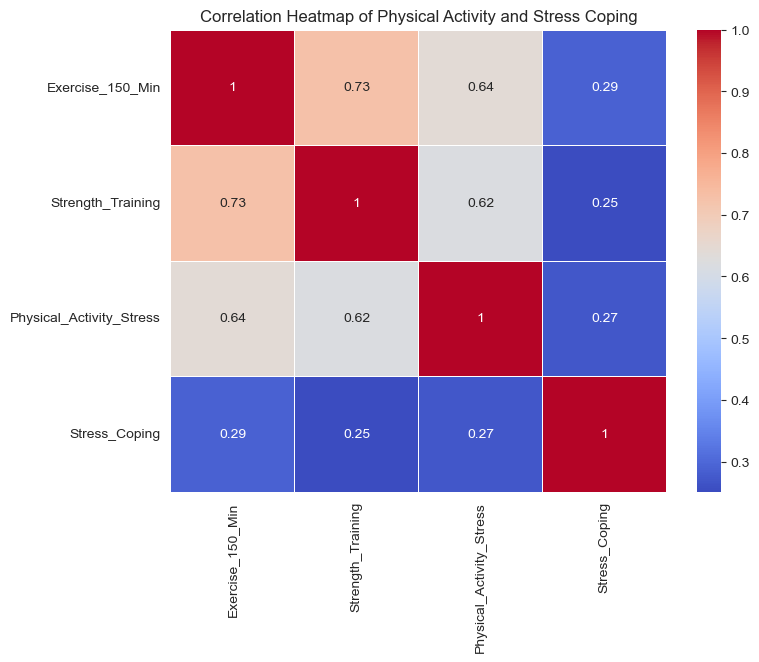

In [135]:
corr = data[['Exercise_150_Min', 'Strength_Training', 'Physical_Activity_Stress', 'Stress_Coping']].corr()

plt.figure(figsize = (8, 6))
sns.heatmap(corr, annot = True, cmap = "coolwarm", linewidths = 0.5)
plt.title("Correlation Heatmap of Physical Activity and Stress Coping")
plt.show()

# Multiple Linear Regression: Predicting the use of physical activity as a stress coping mechanism
- ## Note: This is before I ran stepwise regression in R. These are variables I assumed to be important

In [137]:
predictors = ["Exercise_150_Min", "Strength_Training", "Stress_Coping", "Feelings", 
              "7_Hours_Sleep", "Controlled_Life", "Parent_Financial_Support",
              "Strong_Social_Network", "Balanced_Diet", "Close_Relationships", 
              "Understand_Purpose"]

X = data[predictors].fillna(data[predictors].mean())
y = data["Physical_Activity_Stress"].fillna(data["Physical_Activity_Stress"].mean())

model = sm.OLS(y, sm.add_constant(X)).fit()
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     Physical_Activity_Stress   R-squared:                       0.477
Model:                                  OLS   Adj. R-squared:                  0.471
Method:                       Least Squares   F-statistic:                     87.97
Date:                      Thu, 17 Apr 2025   Prob (F-statistic):          5.10e-141
Time:                              20:53:33   Log-Likelihood:                -1187.7
No. Observations:                      1075   AIC:                             2399.
Df Residuals:                          1063   BIC:                             2459.
Df Model:                                11                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

# Multiple Linear Regression: Predicting the use of physical activity as a stress coping mechanism
- ## Note: This is after I ran stepwise regression in R

In [139]:
final_predictors = [
    'Club_Sports', 'Social_Sorority/Fraternity', 'Exercise_150_Min',
    'Strength_Training', 'Healthy_Meal_Choices', 'Avoid_Alcohol',
    'Regular_Medical_Visits', 'Manage_Conflict', 'Feelings', 'Body_Image',
    'Learn_New_Things', 'Challenges_Growth', 'Current_Events',
    'Personal_Values', 'Spirituality_Hardship', 'Track_Spending',
    'Financial_Anxiety', 'Future_Financial_Plan', 'Contribution',
    'Family_Grad_History', 'Controlled_Life', 'Openness', 'Budget'
]

clean_data = (data[final_predictors + ['Physical_Activity_Stress']]
              .replace([np.inf, -np.inf], np.nan)
              .dropna()
              .copy())


X_final = clean_data[final_predictors]
y_final = clean_data["Physical_Activity_Stress"]

final_model = sm.OLS(y_final, sm.add_constant(X_final)).fit()
print(final_model.summary())

                               OLS Regression Results                               
Dep. Variable:     Physical_Activity_Stress   R-squared:                       0.512
Model:                                  OLS   Adj. R-squared:                  0.502
Method:                       Least Squares   F-statistic:                     47.24
Date:                      Thu, 17 Apr 2025   Prob (F-statistic):          1.45e-143
Time:                              20:53:33   Log-Likelihood:                -1131.8
No. Observations:                      1058   AIC:                             2312.
Df Residuals:                          1034   BIC:                             2431.
Df Model:                                23                                         
Covariance Type:                  nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

# Visualizing coefficients for the Multiple Linear Regression model
- ## Note: this is after performing stepwise regression in R

C:\Users\wolzi\AppData\Local\Temp\ipykernel_6472\3220313088.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_10_positive.values, y=top_10_positive.index,


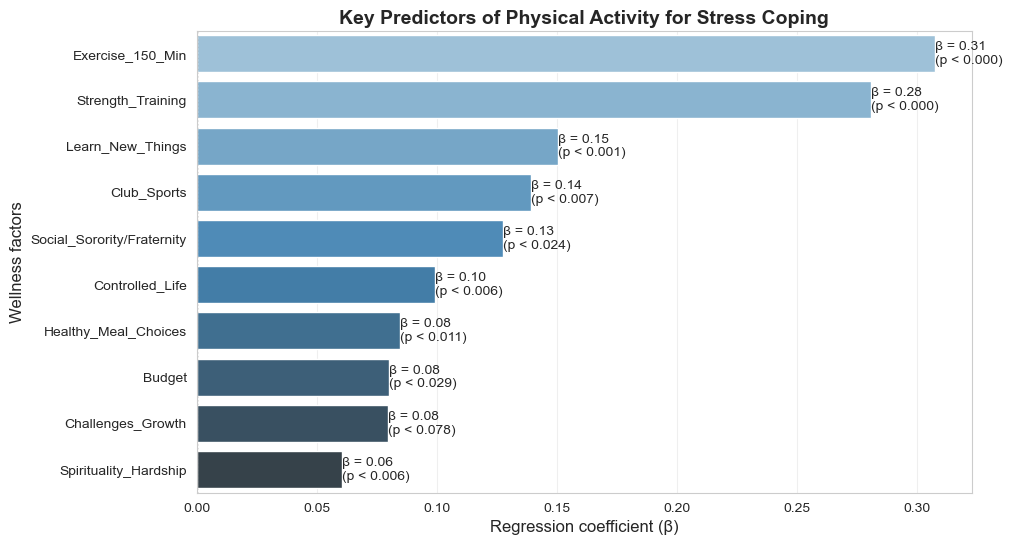

In [141]:
positive_coefs = final_model.params[1:][final_model.params[1:] > 0]
top_10_positive = positive_coefs.sort_values(ascending=False)[:10]

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_10_positive.values, y=top_10_positive.index, 
                 palette="Blues_d", saturation=0.8)
plt.title("Key Predictors of Physical Activity for Stress Coping", 
          fontsize=14, pad=5, fontweight='semibold')
plt.xlabel("Regression coefficient (β)", fontsize=12)
plt.ylabel("Wellness factors", fontsize=12)
plt.axvline(0, color='gray', linestyle=':', linewidth=1)
plt.grid(axis='x', alpha=0.3)

for i, (coef, pred) in enumerate(zip(top_10_positive.values, top_10_positive.index)):
    ax.text(coef, i, f"β = {coef:.2f}\n(p < {final_model.pvalues[pred]:.3f})", 
            ha='left' if coef > 0 else 'right', 
            va='center',
            fontsize=10,
            linespacing=1.2)

# Random Forest Model for `Physical_Activity_Stress`

In [143]:
rf_reg = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=42)
rf_reg.fit(X, y)
oob_pred = rf_reg.oob_prediction_
print(f"OOB MAE: {mean_absolute_error(y, oob_pred):.3f}")
print(f"OOB RMSE: {np.sqrt(mean_squared_error(y, oob_pred)):.3f}")

OOB MAE: 0.629
OOB RMSE: 0.787


# Random Forest Variable Importance plot for `Physical_Activity_Stress`

C:\Users\wolzi\AppData\Local\Temp\ipykernel_6472\2764636156.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Feature', y='Importance',


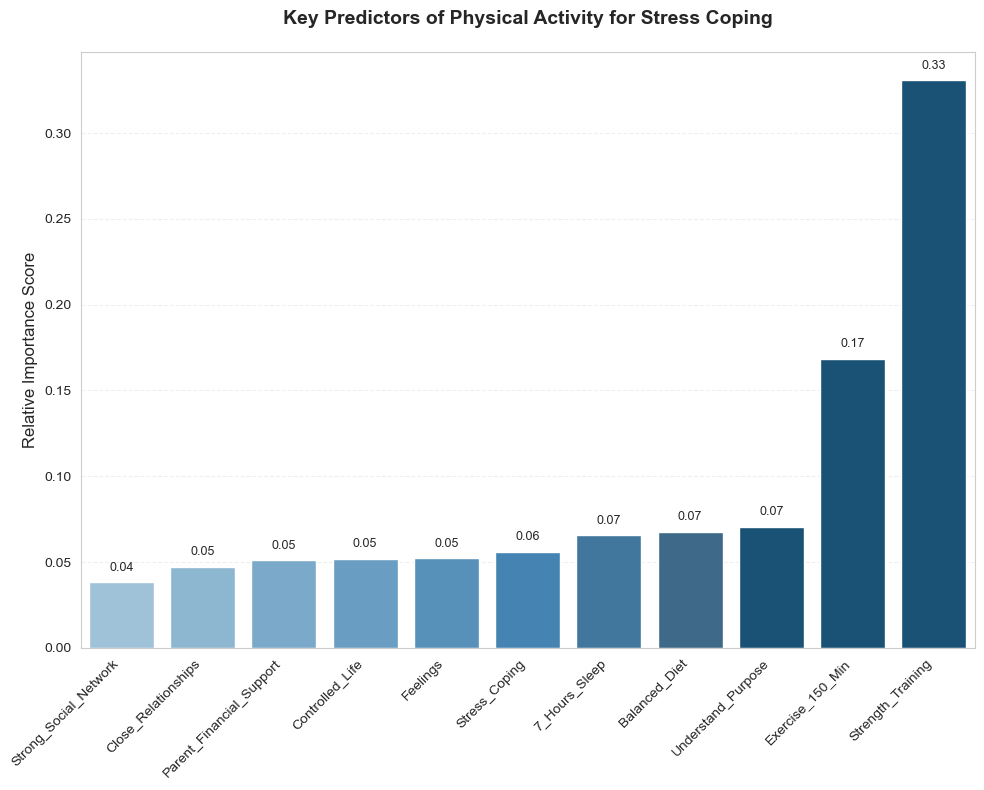

In [145]:
plt.figure(figsize=(10, 8))

importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_reg.feature_importances_
}).sort_values('Importance', ascending=True).tail(15)  

ax = sns.barplot(x='Feature', y='Importance', 
                 data=importance,
                 palette="Blues_d",
                 saturation=0.8)

plt.title("Key Predictors of Physical Activity for Stress Coping", 
          fontsize=14, pad=20, fontweight='semibold')
plt.ylabel("Relative Importance Score", fontsize=12)
plt.xlabel("")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Highlight top 3 features
for i in range(1, 4):
    ax.patches[-i].set_facecolor('#1a5276') 

# Add value labels
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., 
            p.get_height() + 0.005, 
            f"{p.get_height():.2f}", 
            ha='center', va='bottom',
            fontsize=9)

plt.tight_layout()
plt.show()

# Neat-looking table for significant p-values from the resulting Multiple Linear Regression model

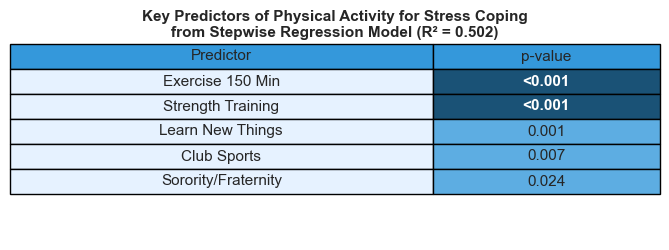

In [147]:
results = pd.DataFrame({
    'Predictor': ['Exercise 150 Min', 'Strength Training', 
                 'Learn New Things', 'Club Sports',
                 'Sorority/Fraternity'],
    'p-value': ['<0.001', '<0.001', '0.001', '0.007', '0.024']
})

fig = plt.figure(figsize=(6.5, 2.0))
ax = fig.add_axes([0, 0, 1, 1]) 
ax.axis('off')

table = ax.table(
    cellText=results.values,
    colLabels=['Predictor', 'p-value'],
    loc='upper center', 
    cellLoc='center',
    colColours=['#3498db']*2,
    cellColours=[['#e6f2ff']*2]*5,
    colWidths=[0.65, 0.35]
)

# Formatting
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 1.5)

# Highlight cells
for (i, j), cell in table.get_celld().items():
    if j == 1 and i > 0:
        pval_text = cell.get_text().get_text()
        if pval_text == '<0.001':
            cell.set_text_props(weight='semibold', color='white')
            cell.set_facecolor('#1a5276')
        elif float(pval_text) < 0.05:
            cell.set_facecolor('#5dade2')

plt.suptitle('Key Predictors of Physical Activity for Stress Coping\nfrom Stepwise Regression Model (R² = 0.502)', 
             y=1.15, 
             fontsize=11, 
             fontweight='semibold')

plt.show()

# Boxplot showing that participating in `Club Sports` vs `Physical_Activity_Stress`

C:\Users\wolzi\AppData\Local\Temp\ipykernel_6472\3840046739.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Club_Sports', y='Physical_Activity_Stress', data=data, palette='Blues_d')


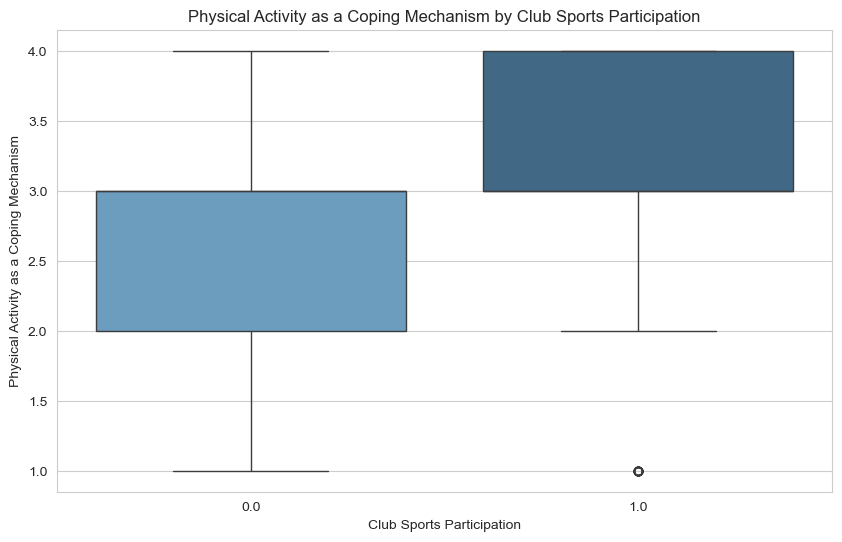

In [149]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Club_Sports', y='Physical_Activity_Stress', data=data, palette='Blues_d')
plt.title('Physical Activity as a Coping Mechanism by Club Sports Participation')
plt.xlabel('Club Sports Participation')
plt.ylabel('Physical Activity as a Coping Mechanism')
plt.show()

# Boxplot showing exercising 150 minutes or more a week vs `Physical_Activity_Stress`

C:\Users\wolzi\AppData\Local\Temp\ipykernel_6472\1452435622.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exercise_150_Min', y='Physical_Activity_Stress', data=data, palette = "Blues_d")


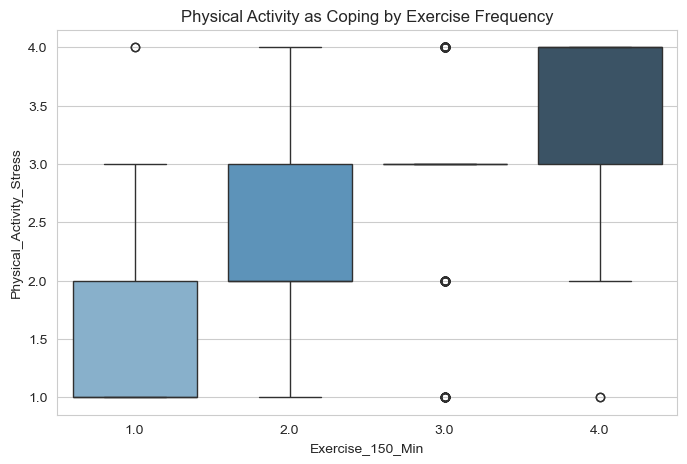

In [151]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Exercise_150_Min', y='Physical_Activity_Stress', data=data, palette = "Blues_d")
plt.title("Physical Activity as Coping by Exercise Frequency")
plt.show()

# Boxplot showing Participation in a Social Sorority or Fraternity vs `Physical_Activity_Stress`

C:\Users\wolzi\AppData\Local\Temp\ipykernel_6472\48097727.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Social_Sorority/Fraternity', y='Physical_Activity_Stress',


Text(0, 0.5, 'Uses Physical Activity for Stress Coping')

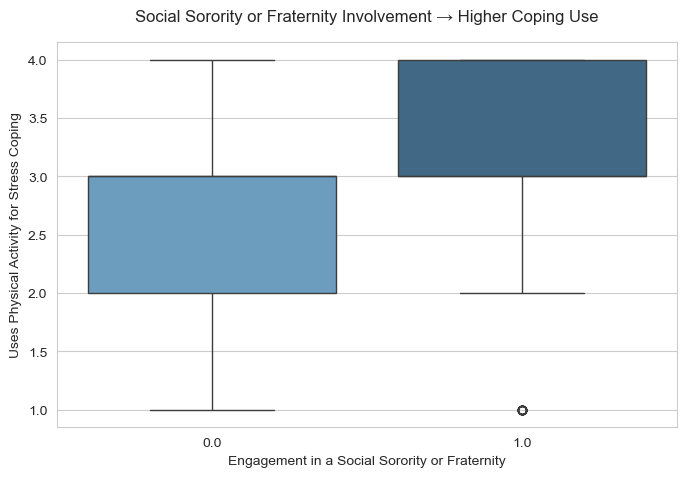

In [153]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Social_Sorority/Fraternity', y='Physical_Activity_Stress', 
            data=data, palette='Blues_d')
plt.title("Social Sorority or Fraternity Involvement → Higher Coping Use", pad=15)
plt.xlabel("Engagement in a Social Sorority or Fraternity")
plt.ylabel("Uses Physical Activity for Stress Coping")